In [14]:
import sys
sys.path.append("../data/saved_models/")
sys.path.append("../model_scripts/")
sys.path.append("../utils/")
import os
import json

import numpy as np
import torch

import matplotlib.pyplot as plt
import fig1_plots

import analysis_rnn as rnn
import analysis_neuro as spk
import basic_analysis as basic
import model_utils
import dim_alignment as dim
from task import generate_batch

from scipy import stats
from sklearn.decomposition import PCA
from scipy.ndimage import gaussian_filter1d
from scipy.spatial import distance as dist

In [15]:
# file paths
data_folder = f"../data/saved_models/1d_2map/"
save_folder = f"../figures/fig1_plots/"

if os.path.isdir(save_folder):
    print('save folder exists')
else:
    os.mkdir(save_folder)

save folder exists


In [16]:
# get the model IDs for all saved models
model_IDs = os.listdir(data_folder)

# select example model
ex_id = 0
model_ID = model_IDs[ex_id]

In [4]:
# get sample rnn data
inputs, outputs, targets = model_utils.sample_rnn_data(data_folder, model_ID)
X, map_targ, pos_targ = model_utils.format_rnn_data(outputs["hidden_states"],\
                                                    targets["map_targets"],\
                                                    targets["pos_targets"])

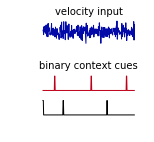

In [5]:
''' Figure 1E: inputs '''
f, gs = fig1_plots.plot_e(inputs["inp_vel"],\
                          inputs["inp_remaps"])
plt.show()
f.savefig(f'{save_folder}inputs.png', dpi=600, bbox_inches='tight')

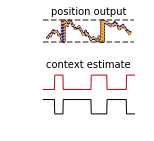

In [6]:
''' Figure 1F: outputs'''
f, gs = fig1_plots.plot_f(targets["pos_targets"],\
                          outputs["pos_outputs"],\
                          outputs["map_logits"])
plt.show()
f.savefig(f'{save_folder}outputs.png', dpi=600, bbox_inches='tight')

mean +/- standard error of the mean:
position loss: 0.0105 +/- 0.000375
context loss: 0.00179 +/- 3.18e-05


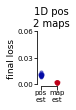

In [7]:
''' summary performance across models '''
f, ax = fig1_plots.plot_supp_1(data_folder, model_IDs)
ax.set_title('1D pos\n2 maps', fontsize=10, pad=5)
plt.show()

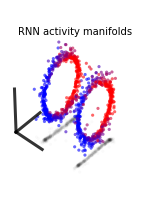

In [8]:
''' Figure 1H: aligned ring manifolds '''
f, ax = fig1_plots.plot_h(X, pos_targ)
plt.show()
f.savefig(f'{save_folder}manifolds.png', dpi=600, bbox_inches='tight')

mean alignment = 0.6
sem misalignment = 0.0092


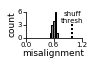

In [9]:
''' Figure 1I (or supp?): summary of ring alignment '''
f, ax = fig1_plots.plot_supp_2(data_folder, model_IDs)
f.savefig(f'{save_folder}alignment.png', dpi=600, bbox_inches='tight')
plt.show()

on average, 3 PCs explain 54.71% of the variance
on average, 12 PCs explain 90.07% of the variance


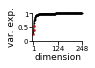

In [10]:
''' Figure 1J: summary of dimensionality '''
f, axes = fig1_plots.plot_j(data_folder, model_IDs,
                            top_num=3, top_num_1=2)
plt.show()
f.savefig(f'{save_folder}PCs_all.png', dpi=600, bbox_inches='tight')

630 total track traversals
59.0 total remapping events


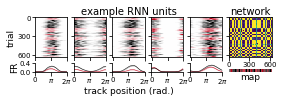

In [17]:
''' plot figure 1G: RNN single unit examples & network similarity '''
f, gs = fig1_plots.plot_g(data_folder, model_IDs[ex_id])
plt.show()
f.savefig(f'{save_folder}ex_tuning_similarity.png', dpi=600, bbox_inches='tight')

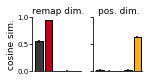

In [12]:
''' Figure 1K: alignment to remapping dim and position subspace '''
f, ax = fig1_plots.plot_k(data_folder, model_IDs)
plt.show()
f.savefig(f'{save_folder}dim_angles.png', dpi=600, bbox_inches='tight')

In [13]:
''' Figure 2F: fixed points on ring manifolds 
this goes somewhere else
'''
# load the fixed points
fixed_pts_np = np.load(f"{base}/saved_models/{model_ID}/states_fixed_pt.npy")
fixed_pts = torch.from_numpy(fixed_pts_np)

# calculate the velocity at each fixed/slow point
num_batch = fixed_pts.shape[0]
num_maps = task_params["num_maps"]
inp_vel = torch.zeros(num_batch, 1)
inp_remaps = torch.zeros(num_batch, num_maps)

X1 = fixed_pts
X2 = model.one_step(fixed_pts, inp_vel, inp_remaps)
X1 = X1.detach().numpy()
X2 = X2.detach().numpy()

vels = np.asarray([])
for x1, x2 in zip(X1, X2): 
    vel = np.sum((x1 - x2)**2)
    vels = np.append(vels, vel)

NameError: name 'base' is not defined

In [ ]:
# filter out points where the velocity is too great
thresh = 0.005
sort_idx = np.argsort(vels)
f, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.scatter(np.arange(vels.shape[0]),
           vels[sort_idx[::-1]], 
           c='k', s=15,
           zorder=0)
xlims = ax.get_xlim()
ax.hlines(thresh, xlims[0], xlims[1],
          linestyles='dotted', colors='r',
          zorder=1, label='thresh'
         )

ax.set_xlim(xlims)
ax.set_ylim(-0.001, 0.02)
ax.set_ylabel('velocity')
ax.set_xlabel('fixed point')
ax.tick_params(which='major', labelsize=8, pad=1)
ax.legend()

plt.show()

In [ ]:
print(f'filtered out {np.sum(vels > thresh)} slow points with velocity > {thresh}')
fixed_pts = fixed_pts[vels < thresh]
fixed_pts_np = fixed_pts_np[vels < thresh]

In [ ]:
f, ax = fig_plots.plot_fig2f(X, fixed_pts, pos_targ)

ax.set_title('')

plt.show()
f.savefig(f'{save_folder}fixed_pts.png', dpi=600, bbox_inches='tight')